In [174]:
import pandas as pd
import numpy as np

# Read and explore data

In [175]:
df = pd.read_csv('data/clickdata.csv', delimiter='\u0001')

In [176]:
df.head()

,epoch_ms,session_id,country_by_ip_address,region_by_ip_address,url_without_parameters,referrer_without_parameters,visitor_recognition_type,useragent,ua_device_class,ua_device_name,...,ua_facebook_device_name,ua_facebook_device_version,ua_facebook_operating_system_name,ua_facebook_operating_system_version,ua_hacker_attackVector,ua_hacker_toolkit,ua_ie_compatibility_version_major,ua_ie_compatibility_name_version_major,ua_carrier,ua_agent_class
0,1520280001034,be73c8d1b836170a21529a1b23140f8e,US,CA,https://www.bol.com/nl/l/nederlandstalige-kuns...,NaN,ANONYMOUS,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Robot,Google,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Robot
1,1520280001590,c24c6637ed7dcbe19ad64056184212a7,US,CA,https://www.bol.com/nl/l/italiaans-natuur-wete...,NaN,ANONYMOUS,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Robot,Google,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Robot
2,1520280002397,ee391655f5680a7bfae0019450aed396,IT,LI,https://www.bol.com/nl/p/nespresso-magimix-ini...,https://www.bol.com/nl/p/nespresso-magimix-ini...,ANONYMOUS,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47....,Desktop,Linux Desktop,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Browser
3,1520280002598,f8c8a696dd37ca88233b2df096afa97f,US,CA,https://www.bol.com/nl/l/nieuwe-engelstalige-o...,NaN,ANONYMOUS,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Robot,Google,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Robot
4,1520280004428,f8b0c06747b7dd1d53c0932306bd04d6,US,CA,https://www.bol.com/nl/l/nieuwe-actie-avontuur...,NaN,ANONYMOUS,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,Robot Mobile,Google,...,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Robot Mobile


Each row in 'df' contains a page request in a session.

CSV column definitions:
* epoch_ms: epoch in milliseconds
* session_id: session identifier
* country_by_ip_address: estimated country based on GeoIP lookup
* region_by_ip_address: estimated region based on GeoIP lookup
* url_without_parameters: 
* referrer_without_parameters: 
* visitor_recognition_type: ANONYMOUS, RECOGNIZED (by cookie) or LOGGEDIN
* useragent: the useragent string sent by the webbrowser
* ua_... : we've parsed the useragent field (with yauaa) and expose it as ua_.... see https://github.com/nielsbasjes/yauaa#values-explained
* ua_agent_class: the class determined by yauaa


In [177]:
# clean up different types of missing values
df = df.replace(np.nan, '', regex=True)
df = df.replace('Unknown', '', regex=True)

## Label data using our 3 classes

In [178]:
crawlers = pd.read_csv('labeled_web_crawlers_augmented.csv', delimiter='\t')
crawlers

,count,name,type,info
0,18123,Googlebot,NHT-search,NaN
1,1032,AdsBot-Google-Mobile,NHT-other,NaN
2,670,Mediapartners-Google,NHT-other,NaN
3,234,Sogou web spider,NHT-search,NaN
4,208,Bingbot,NHT-search,NaN
5,171,Applebot,NHT-other,NaN
6,65,facebookexternalhit,NHT-other,NaN
7,48,WhatsApp,NHT-other,NaN
8,34,UptimeRobot,NHT-other,NaN
9,33,Pinterestbot,NHT-other,NaN


In [179]:
def trafficType(ua): 
    for i, row in crawlers.iterrows():
        if ua.find(row['name']) >= 0:
            return row['type']
    #no crawler? return human
    return 'HT'

In [180]:
df['traffic_type'] = df['useragent'].map(trafficType)

In [181]:
df.head()

,epoch_ms,session_id,country_by_ip_address,region_by_ip_address,url_without_parameters,referrer_without_parameters,visitor_recognition_type,useragent,ua_device_class,ua_device_name,...,ua_facebook_device_version,ua_facebook_operating_system_name,ua_facebook_operating_system_version,ua_hacker_attackVector,ua_hacker_toolkit,ua_ie_compatibility_version_major,ua_ie_compatibility_name_version_major,ua_carrier,ua_agent_class,traffic_type
0,1520280001034,be73c8d1b836170a21529a1b23140f8e,US,CA,https://www.bol.com/nl/l/nederlandstalige-kuns...,,ANONYMOUS,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Robot,Google,...,,,,,,,,,Robot,NHT-search
1,1520280001590,c24c6637ed7dcbe19ad64056184212a7,US,CA,https://www.bol.com/nl/l/italiaans-natuur-wete...,,ANONYMOUS,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Robot,Google,...,,,,,,,,,Robot,NHT-search
2,1520280002397,ee391655f5680a7bfae0019450aed396,IT,LI,https://www.bol.com/nl/p/nespresso-magimix-ini...,https://www.bol.com/nl/p/nespresso-magimix-ini...,ANONYMOUS,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47....,Desktop,Linux Desktop,...,,,,,,,,,Browser,HT
3,1520280002598,f8c8a696dd37ca88233b2df096afa97f,US,CA,https://www.bol.com/nl/l/nieuwe-engelstalige-o...,,ANONYMOUS,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Robot,Google,...,,,,,,,,,Robot,NHT-search
4,1520280004428,f8b0c06747b7dd1d53c0932306bd04d6,US,CA,https://www.bol.com/nl/l/nieuwe-actie-avontuur...,,ANONYMOUS,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,Robot Mobile,Google,...,,,,,,,,,Robot Mobile,NHT-search


# Train a model

In [290]:
import pandas as pd
# select a few columns and transform them into features
X = pd.get_dummies(data=df[['ua_agent_name', 'ua_agent_version_major']], drop_first=True)
y = df['traffic_type']

In [291]:
# naively split the data and train a model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [292]:
# pick an existing classifier algorithm
from sklearn.ensemble import RandomForestClassifier
my_classifier = RandomForestClassifier()

In [293]:
%time my_classifier.fit(X_train, y_train)

CPU times: user 1.12 s, sys: 27.9 ms, total: 1.14 s
Wall time: 226 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Evaluate the model

In [294]:
# model score
%time my_classifier.score(X_test, y_test)

CPU times: user 55.8 ms, sys: 3.99 ms, total: 59.8 ms
Wall time: 31.7 ms


0.9905660377358491

In [295]:
from sklearn.metrics import confusion_matrix
y_pred = my_classifier.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

In [296]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[9628  141    0]
 [   0  602    0]
 [   0    0 4575]]
Normalized confusion matrix
[[0.9856 0.0144 0.    ]
 [0.     1.     0.    ]
 [0.     0.     1.    ]]


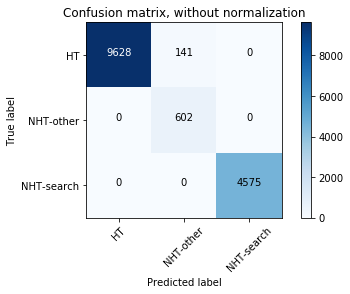

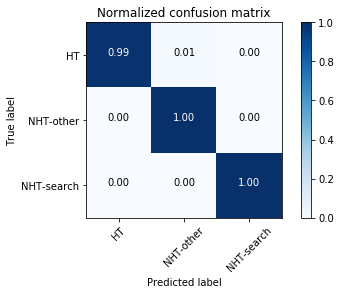

In [297]:
class_names = my_classifier.classes_
np.set_printoptions(precision=4)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


In [302]:
misclassified = np.where(y_test != my_classifier.predict(X_test))
df_indexes = X_test.index.take(misclassified)[0]
print(len(df_indexes))
df.take(df_indexes)[['ua_agent_name','ua_agent_version_major', 'traffic_type']]

141


,ua_agent_name,ua_agent_version_major,traffic_type
23922,Hacker,Hacker,HT
57137,Hacker,Hacker,HT
29392,Hacker,Hacker,HT
11293,Hacker,Hacker,HT
25581,Hacker,Hacker,HT
12414,Hacker,Hacker,HT
45503,BingPreview,1,HT
32417,Hacker,Hacker,HT
50459,Hacker,Hacker,HT
20589,Hacker,Hacker,HT


In [299]:
df['ua_agent_name'].value_counts()

Googlebot                     20255
Chrome                        12579
Safari                         9813
Internet Explorer              7319
SamsungBrowser                 2322
Firefox                        2088
Hacker                         1177
Edge                           1111
UIWebView                      1083
Chrome Webview                  717
Sogou web spider                234
Applebot                        171
AhrefsBot                       158
Bingbot                         104
Opera                            89
Caliperbot                       65
facebookexternalhit              62
Netscape                         49
WhatsApp                         48
UptimeRobot                      34
Chromium                         34
Pinterestbot                     33
YandexBot                        32
Dalvik                           31
MiuiBrowser                      23
Google Favicon (Chrome)          21
Stock Android Browser            19
SemrushBot                  

In [317]:
 pd.set_option('max_colwidth',400)
df[(df.traffic_type != 'HT') & (df.ua_agent_name == 'Hacker')][['useragent', 'ua_agent_name', 'traffic_type']]

,useragent,ua_agent_name,traffic_type
21,Mediapartners-Google,Hacker,NHT-other
66,Mediapartners-Google,Hacker,NHT-other
89,Mediapartners-Google,Hacker,NHT-other
206,Mediapartners-Google,Hacker,NHT-other
251,Mediapartners-Google,Hacker,NHT-other
457,Mediapartners-Google,Hacker,NHT-other
472,Mediapartners-Google,Hacker,NHT-other
527,Mediapartners-Google,Hacker,NHT-other
599,Mediapartners-Google,Hacker,NHT-other
688,Mediapartners-Google,Hacker,NHT-other


# Predict a single element

In [300]:
# predict an individual data record
y_pred = my_classifier.predict([X_test.iloc[42]])[0]
y_real = y_test.iloc[42]
print(y_pred)
print(y_real)

NHT-search
NHT-search
